# Воронка продаж с сайта и расчёт маржинальности устройств_Мегафон

<b>Задание 1</b>
<br>Напишите запрос, который бы возвращал таблицу, на основе которой можно построить воронку продаж от количества заявок на сайте до выдачи с группировкой по продукту. Постройте воронку.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# загружаю датасеты
import requests
from urllib.parse import urlencode

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/H20csvzkmhyfLQ'

# Получаю загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

site = pd.read_csv(download_url, encoding='windows-1251',sep=';')
site.head()

,APPLICATION_ID
0,SITE-10
1,SITE-1
2,SITE-4
3,SITE-22
4,SITE-11


In [3]:
public_key = 'https://disk.yandex.ru/d/k7izcocAOwJ3Hg'

# Получаю загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

crm = pd.read_csv(download_url, encoding='windows-1251',sep=';')
crm.head()

,APPLICATION_ID,CLIENT_ID,INTEGRATION_ID,APPROVED_FLG,ISSUED_FLG,ASK_PROD_TYPE_NM
0,1,52363,SITE-10,1,0,A
1,2,69440,SITE-1,0,0,B
2,3,69387,SITE-4,0,0,B
3,4,36849,SITE-22,1,0,A
4,5,69487,SITE-11,0,0,B


In [4]:
# соединяю таблицы
site_crm = site.merge(crm, how='left', left_on='APPLICATION_ID', right_on='INTEGRATION_ID')
site_crm.ASK_PROD_TYPE_NM = site_crm.ASK_PROD_TYPE_NM.fillna(0)
site_crm.tail(30)

,APPLICATION_ID_x,APPLICATION_ID_y,CLIENT_ID,INTEGRATION_ID,APPROVED_FLG,ISSUED_FLG,ASK_PROD_TYPE_NM
131119,SITE-129240,NaN,NaN,NaN,NaN,NaN,0
131120,SITE-12927,NaN,NaN,NaN,NaN,NaN,0
131121,SITE-129289,NaN,NaN,NaN,NaN,NaN,0
131122,SITE-129314,NaN,NaN,NaN,NaN,NaN,0
131123,SITE-129323,NaN,NaN,NaN,NaN,NaN,0
131124,SITE-129329,NaN,NaN,NaN,NaN,NaN,0
131125,SITE-129401,NaN,NaN,NaN,NaN,NaN,0
131126,SITE-129419,NaN,NaN,NaN,NaN,NaN,0
131127,SITE-129427,NaN,NaN,NaN,NaN,NaN,0
131128,SITE-129454,NaN,NaN,NaN,NaN,NaN,0


In [5]:
# делаю агрегат
site_crm_agg = site_crm \
    .groupby('ASK_PROD_TYPE_NM', as_index=False) \
    .agg({'APPLICATION_ID_x': 'count', 'INTEGRATION_ID': 'count', 'APPROVED_FLG': 'sum', 'ISSUED_FLG': 'sum'})
site_crm_agg

,ASK_PROD_TYPE_NM,APPLICATION_ID_x,INTEGRATION_ID,APPROVED_FLG,ISSUED_FLG
0,0,1312,0,0.0,0.0
1,A,63731,63731,8597.0,1350.0
2,B,66106,66106,11900.0,4210.0


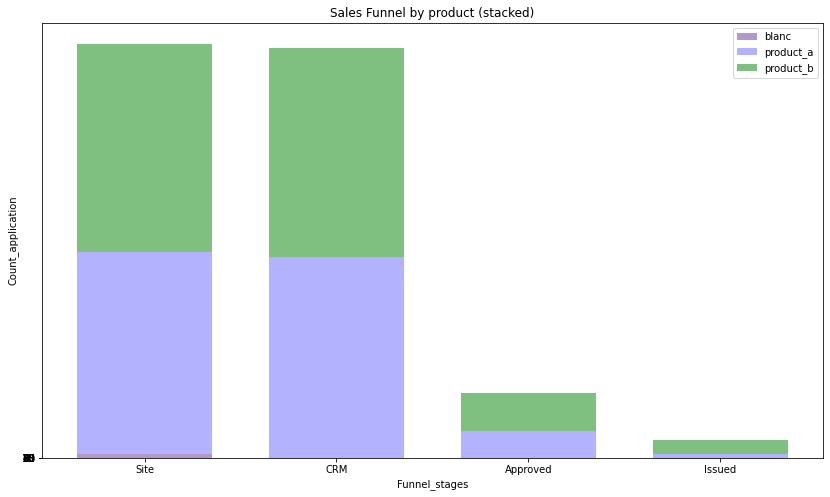

In [6]:
fig = plt.subplots(figsize=(14, 8))

#задаю сеты значений
blanc = [site_crm_agg.APPLICATION_ID_x[0], site_crm_agg.INTEGRATION_ID[0], site_crm_agg.APPROVED_FLG[0], site_crm_agg.ISSUED_FLG[0]]
product_a = [site_crm_agg.APPLICATION_ID_x[1], site_crm_agg.INTEGRATION_ID[1], site_crm_agg.APPROVED_FLG[1], site_crm_agg.ISSUED_FLG[1]]
product_b = [site_crm_agg.APPLICATION_ID_x[2], site_crm_agg.INTEGRATION_ID[2], site_crm_agg.APPROVED_FLG[2], site_crm_agg.ISSUED_FLG[2]]

#параметры
# N = 4 
# barWidth = .5
# xloc = np.arange (N)

#настраиваю отображение графика
p1 = plt.bar (np.arange (4), blanc, width=.7, color='rebeccapurple', alpha=0.5)
p2 = plt.bar (np.arange (4), product_a, bottom=blanc, width=.7, color='blue', alpha=0.3)
p3 = plt.bar (np.arange (4), product_b, bottom=list(map(sum, zip(blanc, product_a))), width=.7, color='green', alpha=0.5)

#добавляю подписи осей, графика, легенду
plt.ylabel('Count_application')
plt.xlabel('Funnel_stages')
plt.title('Sales Funnel by product (stacked)')
plt.xticks (np.arange (4),('Site', 'CRM', 'Approved', 'Issued'))
plt.yticks (np.arange (0, 85, 5))
plt.legend((p1[0], p2[0], p3[0]),('blanc', 'product_a', 'product_b'))

plt.show()

<b>Задание 2</b>
<br>Клиенты могут совершать повторные заявки. Характеристики клиентов, которые делают повторные заявки и которые их не делают, отличаются. Необходимо отсегментировать заявки из таблицы CRM исходя из того, сколько всего клиент сделал заявок. Напишите запрос, который бы рассчитывал дополнительное поле для таблицы CRM, где находился бы сегмент клиента по признаку количества сделанных заявок (шаг для сегментации задайте произвольно).
<br>Рассмотрите воронку продаж в разрезе полученных сегментов.
<br>Какие закономерности это позволило выявить? Предложите объяснение.

In [7]:
# создаю поле с количеством заявок по клиенту и продукту
crm['count_appl'] = crm.groupby(['CLIENT_ID', 'ASK_PROD_TYPE_NM']).APPLICATION_ID.transform('count')

# задаю функцию для проставления сегмента
def ntile(series, n):
    return pd.qcut(series.rank(method='first'), n, labels=False) + 1

# проставляю сегмент
crm['segment'] = crm.groupby('ASK_PROD_TYPE_NM').count_appl.transform(lambda x: ntile(x, 5))

crm.head()

,APPLICATION_ID,CLIENT_ID,INTEGRATION_ID,APPROVED_FLG,ISSUED_FLG,ASK_PROD_TYPE_NM,count_appl,segment
0,1,52363,SITE-10,1,0,A,1,1
1,2,69440,SITE-1,0,0,B,1,1
2,3,69387,SITE-4,0,0,B,1,1
3,4,36849,SITE-22,1,0,A,1,1
4,5,69487,SITE-11,0,0,B,1,1


In [8]:
# создаю поле с количеством заявок по клиенту
crm['count_appl2'] = crm.groupby('CLIENT_ID').APPLICATION_ID.transform('count')

# задаю функцию для проставления сегмента
def ntile(series, n):
    return pd.qcut(series.rank(method='first'), n, labels=False) + 1

# проставляю сегмент
crm['segment2'] = crm.count_appl2.transform(lambda x: ntile(x, 5))

crm.head(40)

,APPLICATION_ID,CLIENT_ID,INTEGRATION_ID,APPROVED_FLG,ISSUED_FLG,ASK_PROD_TYPE_NM,count_appl,segment,count_appl2,segment2
0,1,52363,SITE-10,1,0,A,1,1,1,1
1,2,69440,SITE-1,0,0,B,1,1,1,1
2,3,69387,SITE-4,0,0,B,1,1,1,1
3,4,36849,SITE-22,1,0,A,1,1,2,4
4,5,69487,SITE-11,0,0,B,1,1,1,1
5,6,25848,SITE-12,0,0,B,1,1,1,1
6,7,50540,SITE-18,0,0,B,1,1,1,1
7,8,19235,SITE-27,0,0,B,1,1,1,1
8,9,69454,SITE-5,0,0,B,1,1,1,1
9,10,2568,SITE-6,0,0,B,3,5,3,5


In [9]:
# делаю агрегат по продукту А
crm_agg_a = crm \
    .query('ASK_PROD_TYPE_NM == "A"') \
    .groupby('segment', as_index=False) \
    .agg({'INTEGRATION_ID': 'count', 'APPROVED_FLG': 'sum', 'ISSUED_FLG': 'sum'})
crm_agg_a

,segment,INTEGRATION_ID,APPROVED_FLG,ISSUED_FLG
0,1,12747,3726,305
1,2,12746,1159,320
2,3,12746,1164,263
3,4,12746,1616,263
4,5,12746,932,199


In [10]:
# делаю агрегат по продукту Б
crm_agg_b = crm \
    .query('ASK_PROD_TYPE_NM == "B"') \
    .groupby('segment', as_index=False) \
    .agg({'INTEGRATION_ID': 'count', 'APPROVED_FLG': 'sum', 'ISSUED_FLG': 'sum'})
crm_agg_b

,segment,INTEGRATION_ID,APPROVED_FLG,ISSUED_FLG
0,1,13222,5402,1247
1,2,13221,1562,882
2,3,13221,1713,917
3,4,13221,2275,739
4,5,13221,948,425


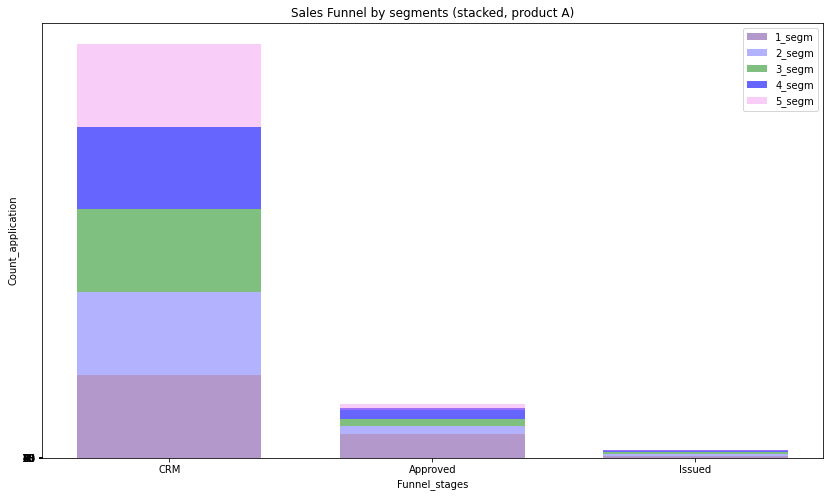

In [11]:
fig = plt.subplots(figsize=(14, 8))

#задаю сеты значений
segm_1 = [crm_agg_a.INTEGRATION_ID[0], crm_agg_a.APPROVED_FLG[0], crm_agg_a.ISSUED_FLG[0]]
segm_2 = [crm_agg_a.INTEGRATION_ID[1], crm_agg_a.APPROVED_FLG[1], crm_agg_a.ISSUED_FLG[1]]
segm_3 = [crm_agg_a.INTEGRATION_ID[2], crm_agg_a.APPROVED_FLG[2], crm_agg_a.ISSUED_FLG[2]]
segm_4 = [crm_agg_a.INTEGRATION_ID[3], crm_agg_a.APPROVED_FLG[3], crm_agg_a.ISSUED_FLG[3]]
segm_5 = [crm_agg_a.INTEGRATION_ID[4], crm_agg_a.APPROVED_FLG[4], crm_agg_a.ISSUED_FLG[4]]

#параметры
# N = 4 
# barWidth = .5
# xloc = np.arange (N)

#настраиваю отображение графика
p1 = plt.bar (np.arange (3), segm_1, width=.7, color='rebeccapurple', alpha=0.5)
p2 = plt.bar (np.arange (3), segm_2, bottom=segm_1, width=.7, color='blue', alpha=0.3)
p3 = plt.bar (np.arange (3), segm_3, bottom=list(map(sum, zip(segm_1, segm_2))), width=.7, color='green', alpha=0.5)
p4 = plt.bar (np.arange (3), segm_4, bottom=list(map(sum, zip(segm_1, segm_2, segm_3))), width=.7, color='blue', alpha=0.6)
p5 = plt.bar (np.arange (3), segm_5, bottom=list(map(sum, zip(segm_1, segm_2, segm_4, segm_5))), width=.7, color='violet', alpha=0.4)

#добавляю подписи осей, графика, легенду
plt.ylabel('Count_application')
plt.xlabel('Funnel_stages')
plt.title('Sales Funnel by segments (stacked, product A)')
plt.xticks (np.arange (3),('CRM', 'Approved', 'Issued'))
plt.yticks (np.arange (0, 85, 5))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]),('1_segm', '2_segm', '3_segm', '4_segm', '5_segm'))

plt.show()

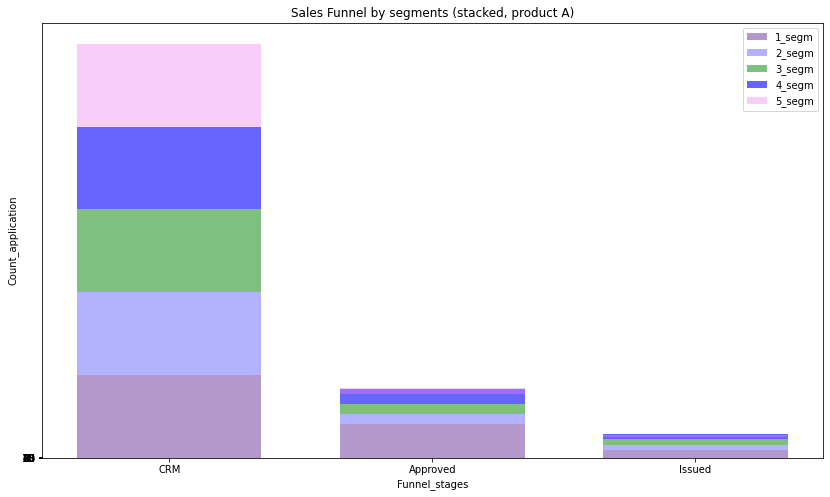

In [12]:
fig = plt.subplots(figsize=(14, 8))

#задаю сеты значений
segm_1 = [crm_agg_b.INTEGRATION_ID[0], crm_agg_b.APPROVED_FLG[0], crm_agg_b.ISSUED_FLG[0]]
segm_2 = [crm_agg_b.INTEGRATION_ID[1], crm_agg_b.APPROVED_FLG[1], crm_agg_b.ISSUED_FLG[1]]
segm_3 = [crm_agg_b.INTEGRATION_ID[2], crm_agg_b.APPROVED_FLG[2], crm_agg_b.ISSUED_FLG[2]]
segm_4 = [crm_agg_b.INTEGRATION_ID[3], crm_agg_b.APPROVED_FLG[3], crm_agg_b.ISSUED_FLG[3]]
segm_5 = [crm_agg_b.INTEGRATION_ID[4], crm_agg_b.APPROVED_FLG[4], crm_agg_b.ISSUED_FLG[4]]

#параметры
# N = 4 
# barWidth = .5
# xloc = np.arange (N)

#настраиваю отображение графика
p1 = plt.bar (np.arange (3), segm_1, width=.7, color='rebeccapurple', alpha=0.5)
p2 = plt.bar (np.arange (3), segm_2, bottom=segm_1, width=.7, color='blue', alpha=0.3)
p3 = plt.bar (np.arange (3), segm_3, bottom=list(map(sum, zip(segm_1, segm_2))), width=.7, color='green', alpha=0.5)
p4 = plt.bar (np.arange (3), segm_4, bottom=list(map(sum, zip(segm_1, segm_2, segm_3))), width=.7, color='blue', alpha=0.6)
p5 = plt.bar (np.arange (3), segm_5, bottom=list(map(sum, zip(segm_1, segm_2, segm_4, segm_5))), width=.7, color='violet', alpha=0.4)

#добавляю подписи осей, графика, легенду
plt.ylabel('Count_application')
plt.xlabel('Funnel_stages')
plt.title('Sales Funnel by segments (stacked, product A)')
plt.xticks (np.arange (3),('CRM', 'Approved', 'Issued'))
plt.yticks (np.arange (0, 85, 5))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]),('1_segm', '2_segm', '3_segm', '4_segm', '5_segm'))

plt.show()

Выводы на основе графиков по продуктам А и Б:
<br>На стадии попадания заявки в CRM распределение клиентов на сегменты по количеству заявок одинаковое. <br>На шаге одобрения заявок больше клиентов из сегмента с малым количеством заявок. Т.е. клиенты с большим количеством заявок отсекаются.
<br>Скорее всего по причине дублирования заявок.
<br>Здесь можно предположить причину непонятный интерфейс - для пользователя неочевидно, что он успешно создал заявку на сайте и делает её повторно, либо медленная скорость отработки заявки и смены статуса.
<br>На шаге выдачи продукта распределение клиентов на сегменты снова выравнивается.

<b>Задание 6</b>
<br>На таблице на листе MARGINALITY приведены данные по начислениям и интернет-трафику группы абонентов.
* Посчитайте затраты на трафик и маржинальность в разрезе типов устройств в абсолютных значениях и в %. Стоимость 1 Мб трафика принять равной 1 копейке;
* Визуализируйте на одном графике выручку, затраты и % GM по типам устройств;
* Определите самую низкомаржинальную категорию среди типов устройств.

<b>Данные</b>
* branch - Филиал
* segment - Сегмент
* device - Тип устройства
* tp - Название ТП
* sum_r - Начисления, руб
* internet_mb - Трафик передачи данных, Мб мегабайт

In [13]:
# загружаю датасет

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/MZ19-2zIodhqQQ'

# Получаю загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

gm = pd.read_csv(download_url, encoding='windows-1251',sep=';', dtype={'sum_r': float, 'internet_mb': float})
gm.head()

,branch,segment,device,tp,sum_r,internet_mb
0,Дальневосточный филиал,B2B LA,PHONE,Федеральный Специальный,NaN,70364.0
1,Дальневосточный филиал,B2B LA,ROUTER,Федерал.Генеральный плюс,1233.0,1571714.0
2,Дальневосточный филиал,B2B LA,ROUTER,Федеральный Специальный,62967.0,14410263.0
3,Дальневосточный филиал,B2B LA,SMARTPHONE,Включайся! Общайся,1263.0,125138.0
4,Дальневосточный филиал,B2B LA,SMARTPHONE,Включайся! Премиум,1857.0,113826.0


In [14]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   branch       5837 non-null   object 
 1   segment      5837 non-null   object 
 2   device       5837 non-null   object 
 3   tp           5837 non-null   object 
 4   sum_r        5794 non-null   float64
 5   internet_mb  5837 non-null   float64
dtypes: float64(2), object(4)
memory usage: 273.7+ KB


<b>! Провела мини EDA.</b> 
<br>Есть нулевые и отрицательные суммы.
<br>+если пробежаться по условиям задания и первым строкам, видно, что сумма себестоимости Мб будет выше выручки (начислений) в некоторых строках из расчёта, что 1 Мб стоит 1 копейку.
<br>Но так как в задании не указано провести предобработку, датасет изменять не буду.

In [15]:
# проверка на пропущенные значения
gm.isna().sum()

branch          0
segment         0
device          0
tp              0
sum_r          43
internet_mb     0
dtype: int64

In [16]:
gm=gm.fillna(0)
gm.head()

,branch,segment,device,tp,sum_r,internet_mb
0,Дальневосточный филиал,B2B LA,PHONE,Федеральный Специальный,0.0,70364.0
1,Дальневосточный филиал,B2B LA,ROUTER,Федерал.Генеральный плюс,1233.0,1571714.0
2,Дальневосточный филиал,B2B LA,ROUTER,Федеральный Специальный,62967.0,14410263.0
3,Дальневосточный филиал,B2B LA,SMARTPHONE,Включайся! Общайся,1263.0,125138.0
4,Дальневосточный филиал,B2B LA,SMARTPHONE,Включайся! Премиум,1857.0,113826.0


In [17]:
# описательные статистики полей
gm['sum_r'].describe()

count    5.837000e+03
mean     5.014498e+04
std      2.815430e+05
min     -5.809000e+03
25%      1.042000e+03
50%      2.767000e+03
75%      1.092100e+04
max      7.782761e+06
Name: sum_r, dtype: float64

In [18]:
gm['internet_mb'].describe()

count    5.837000e+03
mean     4.938013e+06
std      3.085141e+07
min      5.000500e+04
25%      8.693700e+04
50%      2.333960e+05
75%      9.763940e+05
max      9.508535e+08
Name: internet_mb, dtype: float64

In [19]:
# проверка на дубликаты
gm.loc[gm.duplicated()]

,branch,segment,device,tp,sum_r,internet_mb


<b>Расчёт затрат на трафик и маржинальность в разрезе типов устройств в абсолютных значениях и в %</b>

In [24]:
# аггрегирую таблицу до устройства
gm_device = gm.groupby('device', as_index=False).agg({'sum_r': 'sum', 'internet_mb': 'sum'})

# считаю затраты в рублях и маржинальность
gm_device = gm_device.assign(cost = gm_device.internet_mb / 100, 
                             margin_abs = gm_device.sum_r - gm_device.internet_mb / 100, 
                             margin_percent = (gm_device.sum_r - gm_device.internet_mb / 100) / gm_device.sum_r)
gm_device

,device,sum_r,internet_mb,cost,margin_abs,margin_percent
0,(пусто),1143614.0,1.402550e+08,1.402550e+06,-258935.86,-0.226419
1,DATA CARD,7577902.0,2.674283e+08,2.674283e+06,4903618.84,0.647095
2,NETWORK DEVICE,164324.0,3.381041e+07,3.381041e+05,-173780.11,-1.057546
3,PHONE,2176633.0,2.578369e+08,2.578369e+06,-401735.68,-0.184567
4,ROUTER,22598284.0,2.374599e+09,2.374599e+07,-1147701.56,-0.050787
5,SMARTPHONE,169055342.0,1.436917e+10,1.436917e+08,25363680.12,0.150032
6,TABLET,12258586.0,1.330076e+09,1.330076e+07,-1042175.68,-0.085016
7,UNDEFINED,2170574.0,1.664914e+08,1.664914e+06,505660.06,0.232961
8,USB MODEM,75550963.0,9.883521e+09,9.883521e+07,-23284243.32,-0.308193


<b>Визуализация выручки, затрат и % GM по типам устройств</b>

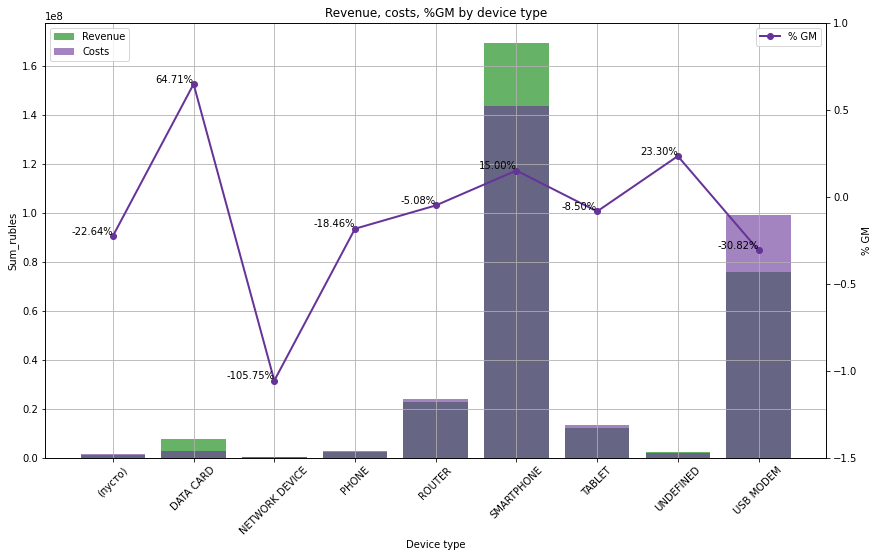

In [25]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Строю графики выручки и затрат
ax1.bar(gm_device.device, gm_device.sum_r, label='Revenue', color='green', alpha=0.6)
ax1.bar(gm_device.device, gm_device.cost, label='Costs', color='rebeccapurple', alpha=0.6)

# Задаю подписи и легенду для оси Y
ax1.set_xlabel('Device type')
ax1.set_ylabel('Sum_rubles')
ax1.set_title('Revenue, costs, %GM by device type')
ax1.legend(loc='upper left')
ax1.grid(True)  #сетка
ax1.set_xticks(gm_device.device)
ax1.set_xticklabels(gm_device.device, rotation=45)

# Создаю вторую ось Y для % GM
ax2 = ax1.twinx()   # общая ось x
# Строю график % GM
ax2.plot(gm_device.device, gm_device.margin_percent, color='rebeccapurple', marker='o', label='% GM', linewidth=2)
# Задаю и настраиваю легенду для GM
ax2.set_ylabel('% GM')
ax2.legend(loc='upper right')

# Поднимаю % GM выше от оси X, т.к. различается диапазон значений % GM и сумм + есть отрицательные значения
ax2.set_ylim(-1.5, 1)

# Добавляю подписи для % GM
for i, txt in enumerate(gm_device.margin_percent):
    ax2.text(gm_device.device[i], gm_device.margin_percent[i], f'{txt:.2%}', color='black', ha='right', va='bottom')

# plt.tight_layout() оптимизация расположения графиков
plt.show()

Пользователи NETWORK DEVICE обладают самой низкой маржинальностью.